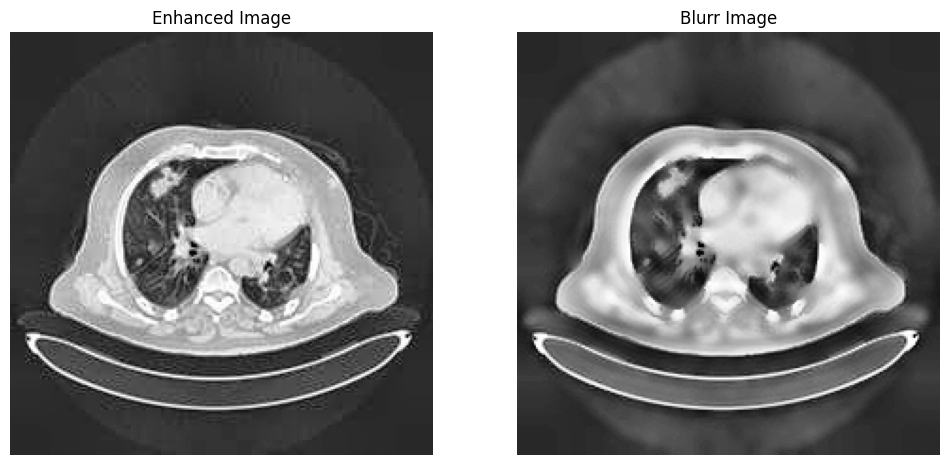

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("CT_001.png", cv2.IMREAD_GRAYSCALE)

# -------------------- Step 1: Create "Blurred" Image --------------------

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
blurred_like_enhanced = clahe.apply(img)


gaussian = cv2.GaussianBlur(blurred_like_enhanced, (0,0), 1)
blurred_like_enhanced = cv2.addWeighted(blurred_like_enhanced, 1.2, gaussian, -0.2, 0)

# Save as blurred image
cv2.imwrite("blurred_xray.png", blurred_like_enhanced)

# -------------------- Step 2: Create "Enhanced" Image" --------------------

denoised = cv2.bilateralFilter(blurred_like_enhanced, d=9, sigmaColor=75, sigmaSpace=75)
enhanced = cv2.addWeighted(denoised, 1.5, cv2.GaussianBlur(denoised, (0,0), 2), -0.5, 0)


enhanced = clahe.apply(enhanced)


cv2.imwrite("enhanced_xray.png", enhanced)

# -------------------- Display --------------------
plt.figure(figsize=(12,6))

plt.subplot(1,2,2)
plt.imshow(enhanced, cmap='gray')
plt.title("Blurr Image")
plt.axis("off")

plt.subplot(1,2,1)
plt.imshow(blurred_like_enhanced, cmap='gray')
plt.title("Enhanced Image")
plt.axis("off")



plt.show()
